In [330]:
isdefined(:PATH) || include("consts.jl")
push!(LOAD_PATH, "../fMRI_ISC_classify/Jthing/")
using NIfTI, OnlineStats, KurchatovFMRI, Plots, Clustering
using ImageView, GtkReactive, Colors, OffsetArrays, ImageSegmentation
using ExcelReaders, ImageFiltering, Stats, Distributions
using ImageView, Images, Optim, HypothesisTests, Vis, Interact
gr()

"""
Exponential weighted Moving average of an array,
calculated online
"""
@inline function ewma(Y,λ = 0.3)
    s = Series(ExponentialWeight(λ), Mean())
    V = similar(Y)
    for (i,v) in enumerate(Y)
        fit!(s,v);
        V[i] = OnlineStats.value(s)[1]
    end
    V
end

"""
Delta-ball coordinates
"""
δ(ind::CartesianIndex, d=1) = CartesianRange(ind-d, ind+d)

#Helper functions for shapes
i2s(i) = ind2sub(SHAPE,i)
s2i(s) = sub2ind(SHAPE,s...)
s2i(s::CartesianIndex) = sub2ind(SHAPE,s.I...)

d = 3
D(ci) = [
    [ci+CartesianIndex((i,i,0)) for i = -d:d:d]...,
    [ci+CartesianIndex((0,i,i)) for i = -d:d:d]...,
    [ci+CartesianIndex((i,0,i)) for i = -d:d:d]...
]

anat = niread("/home/ashedko/Projects/UIR/Harvard-Oxford\ cortical\ and\ subcortical\ structural\ atlases/HarvardOxford-cort-maxprob-thr50-2mm.nii.gz")

"""
Mean of the correltaion matrix for delta-ball
around `cent` 
"""
function mn_cor(ni,cent, X = 1:400)    
    TS = reshape([ewma(ni[coord.I...,X], 0.1) for coord in δ(cent)], (27))   
    mean(cor(t1,t2) for t1 in TS, t2 in TS )
end

INFO: Precompiling module ImageSegmentation.


mn_cor

In [18]:
subj = 1;
diff = open("out/dist_$(subj)_S.ser", "r") do f
  deserialize(f)
end

res = kmeans(diff, 2)
nimm = niread("/media/ashedko/_data_/datasets/UNC/$subj/mean.nii", mmap = true);
msk = reshape(res.assignments.-1, SHAPE)

91×109×91 Array{Int64,3}:
[:, :, 1] =
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0

Interact.Options{:SelectionSlider,Any}(333: "input-113" = 46 Any , "i", 46, "46", 46, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict{Any,Any}(Pair{Any,Any}(68, "68"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(89, "89"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(39, "39"),Pair{Any,Any}(46, "46"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(55, "55"),Pair{Any,Any}(42, "42")…)), Any[], Any[], true, "horizontal")

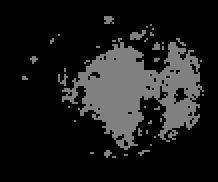

In [42]:
@manipulate  for i in 1:size(msk,3) Gray.(msk/2)[:,:,i] end

In [218]:
# for i = 1:27 diff[i,:] = diff[i,:]./reshape(nimm,SIZE) end
p = [spy(deltas[2][:,:,i]) for i = 1:3]
display.(p)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 
 
<image width="364" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAWwAAAFsCAYAAADon4O5AAAFWUlEQVR4nO3WsQ3CQBBFQR8iIqI7
qqAUIlogoTtSJCTTAok5PWumgp/s047L+bou7N7zdR+zN7Ct9+3klnfuMHsAAL8RbIAIwQaIEGyA
CMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAI
wQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjB
BogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEG
iBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaI
EGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQ
bIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBs
gAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyA
CMEGiBBsgAjBBogYy3JcZ4/gHz5j9gK29VkfbnnnfNgAEYINECHYABGCDRAh2AARgg0QIdgAEYIN
ECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0Q
IdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh
2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHY
ABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgA
EYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AAR
gg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGC
DRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QMS7n6zp7
BNt7vu5j9ga29b6d3PLO+bABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsg
QrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBC
sAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKw
ASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrAB
IgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEi
BBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIE
GyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQb
IEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsg4gtK9xWScsw9VQAAAABJRU5ErkJg
gg==
" transform="translate(94, 12)"/>
 
 
 
 
 
 
 
<image width="18" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAABIAAAFsCAYAAADBkelSAAACHUlEQVR4nO2c223EMAwEqUD9V5Eu
4yOvBPpjEAwIqoCF9kU5vljnyd8KYP0QIBERN+thgAoC4qhVzqVmcw0Te7BGHLWgkk0BgdQo1yZr
lH8Q0Ca7Wxy1Ux8GKBICOhAQaT+lESQ2aD9Gbe1vgU4mAiSkRgEpk824NjnZRvsh1yj7la6N1Qi0
35ZsnWtC+yORF1pxo3zUMNcYjZTUVqMeCMFBqUFAUGeN1HRA5Ds2CKjyIEBK+xlqt8qnEUSNAiLf
+Y+lFslgTdaImkc3itmUkJpxZm+ym3XLppHwOKI0Eh5HXPt1gw2035Zs0P6x7QeT7aO2rrVAtooY
2++z33aukf8PKSutUKNN9j8C5WrUraXWL18gZ2s09mlk8DzaZPdAQvtDRk1oP/TjupMaZT+Uo8Gl
NdpPAQmpYa7pks2VFhtsOo249iMwS+3NMs5sBEbZ/qXWA/ke2AfPbIya8WEUAtJVZO3vF2g/g6Oc
2XM1AqnZkg0eRxAQtSOlRmt/s4TUVqMXQAyOcmbr5pFu1N6CPqoRJntwaXU5MrZfl+zB1MCfM6Dv
sn3n2s7sF0A6apTYGDWhRkmVVpjswa5R1Ar6etmo0cGo2a4JoXYE2n909nPJttkPltZ2/xGYbOge
LZ/9Oo2WWr/A0kI34GA7Iv/KnksNm0eDNeKo6dq/rvVAVEWoHQmHf+kumcaoBfQmArwngnON0sjX
fs7+udQgoC/rNOfnsknqIwAAAABJRU5ErkJggg==
" transform="translate(470, 12)"/>
 
 
 - 
 
 
 0.050 
 
 
 - 
 
 
 0.025 
 
 
 0 
 
 
 0.025 
 
 
 0.050

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 
 
<image width="364" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAWwAAAFsCAYAAADon4O5AAAFWUlEQVR4nO3WsQ3CQBBFQR8iIqI7
qqAUIlogoTtSJCTTAok5PWumgp/s047L+bou7N7zdR+zN7Ct9+3klnfuMHsAAL8RbIAIwQaIEGyA
CMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAI
wQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjB
BogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEG
iBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaI
EGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQ
bIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBs
gAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyA
CMEGiBBsgAjBBogYy3JcZ4/gHz5j9gK29VkfbnnnfNgAEYINECHYABGCDRAh2AARgg0QIdgAEYIN
ECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0Q
IdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh
2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHY
ABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgA
EYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AAR
gg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGC
DRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QMS7n6zp7
BNt7vu5j9ga29b6d3PLO+bABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsg
QrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBC
sAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKw
ASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrAB
IgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEi
BBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIE
GyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQb
IEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsg4gtK9xWScsw9VQAAAABJRU5ErkJg
gg==
" transform="translate(94, 12)"/>
 
 
 
 
 
 
 
<image width="18" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAABIAAAFsCAYAAADBkelSAAACHUlEQVR4nO2c223EMAwEqUD9V5Eu
4yOvBPpjEAwIqoCF9kU5vljnyd8KYP0QIBERN+thgAoC4qhVzqVmcw0Te7BGHLWgkk0BgdQo1yZr
lH8Q0Ca7Wxy1Ux8GKBICOhAQaT+lESQ2aD9Gbe1vgU4mAiSkRgEpk824NjnZRvsh1yj7la6N1Qi0
35ZsnWtC+yORF1pxo3zUMNcYjZTUVqMeCMFBqUFAUGeN1HRA5Ds2CKjyIEBK+xlqt8qnEUSNAiLf
+Y+lFslgTdaImkc3itmUkJpxZm+ym3XLppHwOKI0Eh5HXPt1gw2035Zs0P6x7QeT7aO2rrVAtooY
2++z33aukf8PKSutUKNN9j8C5WrUraXWL18gZ2s09mlk8DzaZPdAQvtDRk1oP/TjupMaZT+Uo8Gl
NdpPAQmpYa7pks2VFhtsOo249iMwS+3NMs5sBEbZ/qXWA/ke2AfPbIya8WEUAtJVZO3vF2g/g6Oc
2XM1AqnZkg0eRxAQtSOlRmt/s4TUVqMXQAyOcmbr5pFu1N6CPqoRJntwaXU5MrZfl+zB1MCfM6Dv
sn3n2s7sF0A6apTYGDWhRkmVVpjswa5R1Ar6etmo0cGo2a4JoXYE2n909nPJttkPltZ2/xGYbOge
LZ/9Oo2WWr/A0kI34GA7Iv/KnksNm0eDNeKo6dq/rvVAVEWoHQmHf+kumcaoBfQmArwngnON0sjX
fs7+udQgoC/rNOfnsknqIwAAAABJRU5ErkJggg==
" transform="translate(470, 12)"/>
 
 
 - 
 
 
 0.125 
 
 
 - 
 
 
 0.100 
 
 
 - 
 
 
 0.075 
 
 
 - 
 
 
 0.050 
 
 
 - 
 
 
 0.025 
 
 
 0 
 
 
 0.025 
 
 
 0.050 
 
 
 0.075 
 
 
 0.100 
 
 
 0.125 
 
<polyline clip-path="url(#clip4500)" style="stroke:#000000; stroke-width:1; stroke-opacity:1; fill:none" points="
 488.27,375.813 488.27,375.813 494.27,375.813 488.27,375.813 488.27,339.413 494.27,339.413 488.27,339.413 488.27,303.013 494.27,303.013 488.27,303.013 
 488.27,266.613 494.27,266.613 488.27,266.613 488.27,230.212 494.27,230.212 488.27,230.212 488.27,193.812 494.27,193.812 488.27,193.812 488.27,157.412 
 494.27,157.412 488.27,157.412 488.27,121.012 494.27,121.012 488.27,121.012 488.27,84.6115 494.27,84.6115 488.27,84.6115 488.27,48.2113 494.27,48.2113 
 488.27,48.2113 488.27,11.811 494.27,11.811 488.27,11.811 
 "/>

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 
 
<image width="364" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAWwAAAFsCAYAAADon4O5AAAFWUlEQVR4nO3WsQ3CQBBFQR8iIqI7
qqAUIlogoTtSJCTTAok5PWumgp/s047L+bou7N7zdR+zN7Ct9+3klnfuMHsAAL8RbIAIwQaIEGyA
CMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAI
wQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjB
BogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEG
iBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaI
EGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQ
bIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBs
gAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyACMEGiBBsgAjBBogQbIAIwQaIEGyA
CMEGiBBsgAjBBogYy3JcZ4/gHz5j9gK29VkfbnnnfNgAEYINECHYABGCDRAh2AARgg0QIdgAEYIN
ECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0Q
IdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh
2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHY
ABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgA
EYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AAR
gg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGC
DRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QIdgAEYINECHYABGCDRAh2AARgg0QMS7n6zp7
BNt7vu5j9ga29b6d3PLO+bABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsg
QrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBC
sAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKw
ASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrAB
IgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEi
BBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIE
GyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsgQrABIgQb
IEKwASIEGyBCsAEiBBsgQrABIgQbIEKwASIEGyBCsAEiBBsg4gtK9xWScsw9VQAAAABJRU5ErkJg
gg==
" transform="translate(94, 12)"/>
 
 
 
 
 
 
 
<image width="18" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAABIAAAFsCAYAAADBkelSAAACHUlEQVR4nO2c223EMAwEqUD9V5Eu
4yOvBPpjEAwIqoCF9kU5vljnyd8KYP0QIBERN+thgAoC4qhVzqVmcw0Te7BGHLWgkk0BgdQo1yZr
lH8Q0Ca7Wxy1Ux8GKBICOhAQaT+lESQ2aD9Gbe1vgU4mAiSkRgEpk824NjnZRvsh1yj7la6N1Qi0
35ZsnWtC+yORF1pxo3zUMNcYjZTUVqMeCMFBqUFAUGeN1HRA5Ds2CKjyIEBK+xlqt8qnEUSNAiLf
+Y+lFslgTdaImkc3itmUkJpxZm+ym3XLppHwOKI0Eh5HXPt1gw2035Zs0P6x7QeT7aO2rrVAtooY
2++z33aukf8PKSutUKNN9j8C5WrUraXWL18gZ2s09mlk8DzaZPdAQvtDRk1oP/TjupMaZT+Uo8Gl
NdpPAQmpYa7pks2VFhtsOo249iMwS+3NMs5sBEbZ/qXWA/ke2AfPbIya8WEUAtJVZO3vF2g/g6Oc
2XM1AqnZkg0eRxAQtSOlRmt/s4TUVqMXQAyOcmbr5pFu1N6CPqoRJntwaXU5MrZfl+zB1MCfM6Dv
sn3n2s7sF0A6apTYGDWhRkmVVpjswa5R1Ar6etmo0cGo2a4JoXYE2n909nPJttkPltZ2/xGYbOge
LZ/9Oo2WWr/A0kI34GA7Iv/KnksNm0eDNeKo6dq/rvVAVEWoHQmHf+kumcaoBfQmArwngnON0sjX
fs7+udQgoC/rNOfnsknqIwAAAABJRU5ErkJggg==
" transform="translate(470, 12)"/>
 
 
 - 
 
 
 0.050 
 
 
 - 
 
 
 0.025 
 
 
 0 
 
 
 0.025 
 
 
 0.050

3-element Array{Void,1}:
 nothing
 nothing
 nothing

In [233]:
PATH_Fmt(subj)

"/media/ashedko/_data_/datasets/UNC/1/"

In [50]:
ni = niread("$(PATH_Fmt(subj))detrended.nii", mmap = true);

diffo = open("out/dist_$(subj)_S.ser", "r") do f
  deserialize(f)
end
# maxs = [maximum(mat[:,i]) for i in 1:SIZE]
# maxs = reshape(maxs,SHAPE);Z = zeros(SHAPE)
kd_m = KData(PATH,"1/mean.nii","logs/1.*",
  x->x)
mn = kd_m.data

diff = similar(diffo)
for i = 1:27 diff[i,:] = diffo[i,:]./reshape(nimm,SIZE) end

# sobel operator kernels for X Y Z
deltas = [Array(reshape(Kernel.sobel((true,true,true),x)[1], (3,3,3))) for x in 1:3]
G = zeros(SIZE) # Result of applying sobel to matrices of distances to the point
for i =1:SIZE
  Df = [sum(del.*reshape(diff[:,i], (3,3,3))) for del in deltas] # Offset array stuff is needed to match the shifted indextes 
  G[i] = sqrt(sum((x->x^2).(Df)))
end

Gl = reshape(G,SHAPE)
d = 1
Gclear = copy(Gl); # clearing eges of the frame
Gclear[:,:,1:2] .= 0 
Gclear[:,1:2,:] .= 0 
Gclear[1:2,:,:] .= 0 

Gclear[:,:,end-1:end] .= 0 
Gclear[:,end-1:end,:] .= 0 
Gclear[end-1:end,:,:] .= 0;

map!(x->isnan(x)?0.0 : x, Gclear, Gclear)

INFO: single file read String["/media/ashedko/_data_/datasets/UNC/1/mean.nii"]
INFO: Meta Read: String["/media/ashedko/_data_/datasets/UNC/logs/1.xlsx"]
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] map!(::##123#124, ::Array{Float64,3}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] include_string(::Module, ::String, ::String) at /home/ashedko/.julia/v0.6/Compat/src/Compat.jl:174
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/ashedko/.julia/v0.6/IJulia/src/execute_request.jl:158
 [6] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/ashedko/.julia/v0.6/Compat/src/Compat.jl:488
 [7] eventloop(::ZMQ.Socket) at /home/ashedko/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[50], in expression starting on line 34


91×109×91 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [52]:
# OffsetArray(1:3,1:3,1:3)
q

778.4062352365276


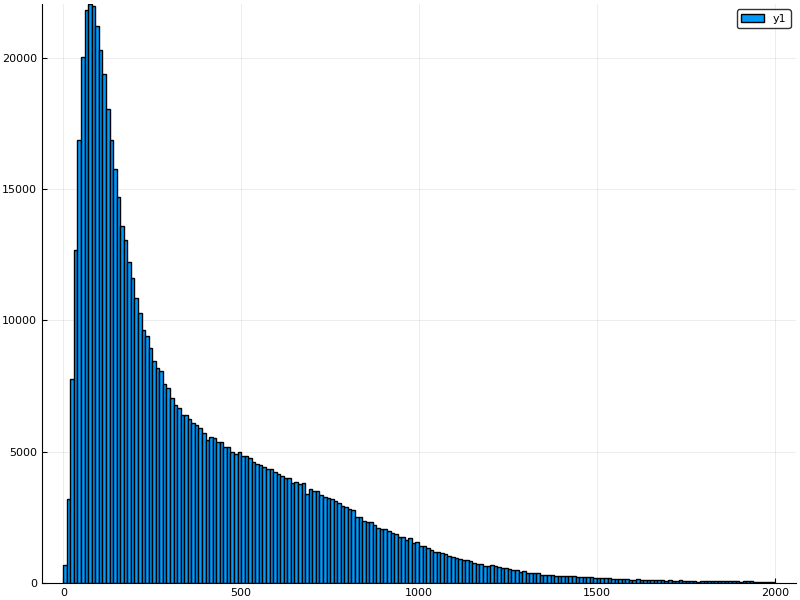

In [5]:
# el,ind = findmax(Gclear)
# i2s(ind)
# [repr(x.I) for x in D(cent)]

histogram(filter(x->x != 0 && x<2000 ,reshape(Gclear,SIZE)),
    size=(800,600))

In [13]:
(CartesianIndex(SHAPE)-2), CartesianIndex((3,3,3))
rng = collect(CartesianRange(CartesianIndex((3,3,3)),(CartesianIndex(SHAPE)-2)))

87×105×87 Array{CartesianIndex{3},3}:
[:, :, 1] =
 CartesianIndex{3}((3, 3, 3))   …  CartesianIndex{3}((3, 107, 3)) 
 CartesianIndex{3}((4, 3, 3))      CartesianIndex{3}((4, 107, 3)) 
 CartesianIndex{3}((5, 3, 3))      CartesianIndex{3}((5, 107, 3)) 
 CartesianIndex{3}((6, 3, 3))      CartesianIndex{3}((6, 107, 3)) 
 CartesianIndex{3}((7, 3, 3))      CartesianIndex{3}((7, 107, 3)) 
 CartesianIndex{3}((8, 3, 3))   …  CartesianIndex{3}((8, 107, 3)) 
 CartesianIndex{3}((9, 3, 3))      CartesianIndex{3}((9, 107, 3)) 
 CartesianIndex{3}((10, 3, 3))     CartesianIndex{3}((10, 107, 3))
 CartesianIndex{3}((11, 3, 3))     CartesianIndex{3}((11, 107, 3))
 CartesianIndex{3}((12, 3, 3))     CartesianIndex{3}((12, 107, 3))
 CartesianIndex{3}((13, 3, 3))  …  CartesianIndex{3}((13, 107, 3))
 CartesianIndex{3}((14, 3, 3))     CartesianIndex{3}((14, 107, 3))
 CartesianIndex{3}((15, 3, 3))     CartesianIndex{3}((15, 107, 3))
 ⋮                              ⋱                                 
 CartesianIn

In [94]:
q = quantile(reshape(Gclear,SIZE), 0.80)
msk = Gclear.> q # +quantile mask

F = falses(SHAPE) # No bounds mask
for i in CartesianRange(CartesianIndex((3,3,3)),(CartesianIndex(SHAPE)-2)) 
    F[i] = true
end

rng_pos_o = collect(CartesianRange(CartesianIndex((1,1,1)),(CartesianIndex(SHAPE))))
rng_pos = rng_pos_o[msk] 
@time res1 = [mn_cor(ni,cnt) for cnt in sample(rng_pos,4000)]
rng_neg = rng_pos_o[.!msk .& F]
@time res2 = [mn_cor(ni,cnt) for cnt in sample(rng_neg,4000)]
filter!(x->!isnan(x),res1)
filter!(x->!isnan(x),res2)
# sort!(res, by=x->x[2])
histogram(res1,label ="quantile +", alpha=.8, fillalpha=.8, bins = 64, title = "Local correlation")
histogram!(res2,label ="quantile -", alpha=.8, fillalpha=.8, bins = 64)
# mean((x->x[2]).(res))

  5.865476 seconds (141.97 M allocations: 5.274 GiB, 17.06% gc time)
  5.885469 seconds (141.97 M allocations: 5.274 GiB, 16.99% gc time)


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 1.0 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 75 
 
 
 100 
 
 
 125 
 
 
 150 
 
 
 175 
 
 
 Local correlation 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 quantile + 
 
 
 
 
 quantile -

In [331]:
res3 = copy(reshape(sqrt.(Gprime),(size(Gprime))|>prod))
# res30 = copy(reshape((Gprime),(size(Gprime))|>prod))
histogram(res3[(res3.>0.000005) .& (res3.<.5)], bins = 100,fillalpha=.8)
# histogram!(res30[(res3.>0.000005) .& (res3.<.5)], bins = 100,fillalpha=.8)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0 
 
 
 0.1 
 
 
 0.2 
 
 
 0.3 
 
 
 0.4 
 
 
 0.5 
 
 
 0 
 
 
 1000 
 
 
 2000 
 
 
 3000 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y1

1.0

Interact.Options{:SelectionSlider,Any}(806: "input-239" = 46 Any , "i", 46, "46", 46, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict{Any,Any}(Pair{Any,Any}(68, "68"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(89, "89"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(39, "39"),Pair{Any,Any}(46, "46"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(55, "55"),Pair{Any,Any}(42, "42")…)), Any[], Any[], true, "horizontal")

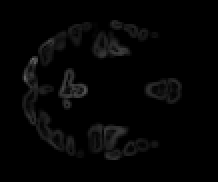

In [337]:
Gnormed = copy(Gclear) 
Gnormed[anat .< 2] = 0.0 #очистка
Gnormed = Gnormed ./maximum(Gnormed) # нормировка
maximum(Gnormed)|>show
Gprime = (x->x.^2).(imgradients(Gnormed,KernelFactors.sobel)) |> sum

Gprime = Gprime./maximum(Gprime) # нормировка
seq = [Gray.(sqrt.(Gprime[j,:,:])|>rotl90) for j in 15:10:75]# генерация иллюстраций

# seq|>display
@manipulate for i in 1:size(Gprime,3) Gray.(sqrt.(Gprime))[:,:,i] end

In [328]:
GPmask = sqrt.(Gprime).> 0.01;
@manipulate for i in 1:size(Gprime,3) Gray.(GPmask)[:,:,i] end

bw = GPmask
dist = 1.-distance_transform(feature_transform(bw));
markers = label_components(dist.<-15);
segments = watershed(dist, markers);


Interact.Options{:SelectionSlider,Any}(799: "input-237" = 46 Any , "i", 46, "46", 46, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict{Any,Any}(Pair{Any,Any}(68, "68"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(89, "89"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(39, "39"),Pair{Any,Any}(46, "46"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(55, "55"),Pair{Any,Any}(42, "42")…)), Any[], Any[], true, "horizontal")

LoadError: [91mUndefVarError: watershed not defined[39m

search: fuzzy_cmeans



No documentation found.

`Clustering.fuzzy_cmeans` is a `Function`.

```
# 1 method for generic function "fuzzy_cmeans":
fuzzy_cmeans(data::Array{T,2}, C::Int64, fuzziness::Real; maxiter, tol, dist_metric, display) where T<:Real in Clustering at /home/ashedko/.julia/v0.6/Clustering/src/fuzzycmeans.jl:58
```


Interact.Options{:SelectionSlider,Any}(525: "input-161" = 46 Any , "i", 46, "46", 46, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict{Any,Any}(Pair{Any,Any}(68, "68"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(89, "89"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(39, "39"),Pair{Any,Any}(46, "46"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(55, "55"),Pair{Any,Any}(42, "42")…)), Any[], Any[], true, "horizontal")

18.23964658430375

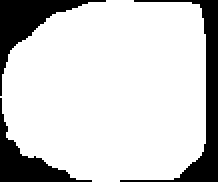

In [123]:
q = quantile(reshape(Gclear,SIZE), 0.90)
show(q)
msk = Gclear.> q # +quantile mask
msk2=falses(SHAPE)
msk2 = .!(msk2)
msk2 = msk2 .& (nimm.> 10.)
ni2 = ni[:,:,:,1]
@manipulate  for i in 1:size(msk2,3) Gray.(msk2)[:,:,i] end


,,,,,,

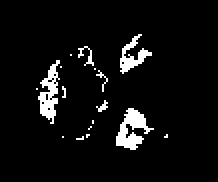
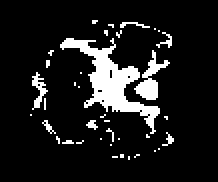
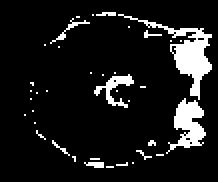
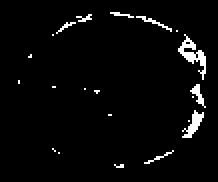
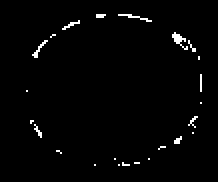
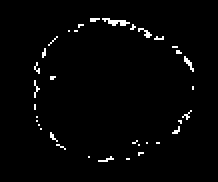
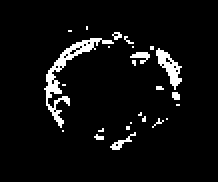

7.247630491006874

Interact.Options{:SelectionSlider,Any}(658: "input-198" = 46 Any , "i", 46, "46", 46, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict{Any,Any}(Pair{Any,Any}(68, "68"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(89, "89"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(39, "39"),Pair{Any,Any}(46, "46"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(55, "55"),Pair{Any,Any}(42, "42")…)), Any[], Any[], true, "horizontal")

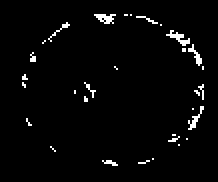

In [151]:
# @manipulate for q=0.5:0.02:0.9 
    q = quantile(reshape(Gclear,SIZE), 0.6)
    show(q)
    msk = Gclear.> q # +quantile mask
    msk2 = msk .& (nimm .>40)
    seq = [Gray.(msk2[:,:,j]) for j in 10:10:75]
    display(seq)
    @manipulate for i in 1:size(msk,3) Gray.(msk2)[:,:,i] end
# end

,,,,,,

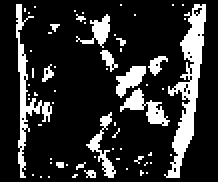
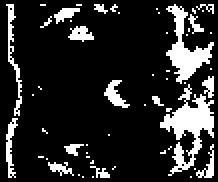
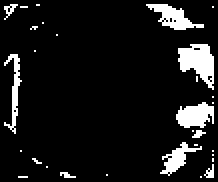
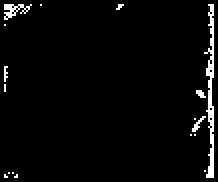
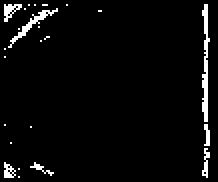
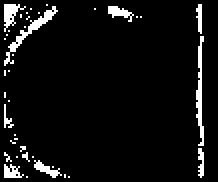
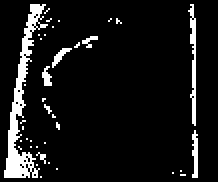

In [37]:
function zst(q)
    msk = Gclear.> q # +quantile mask
    rng_pos_o = collect(CartesianRange(CartesianIndex((1,1,1)),(CartesianIndex(SHAPE))))
    rng_pos = rng_pos_o[msk] 
    res1 = [mn_cor(ni,cnt) for cnt in sample(rng_pos,2000)]
    rng_neg = rng_pos_o[.!msk .& F]
    res2 = [mn_cor(ni,cnt) for cnt in sample(rng_neg,2000)]
    abs(mean(res1)-mean(res2))
end

zst (generic function with 1 method)

In [67]:
?silhouettes
# UnequalVarianceTTest(res1,res2)
# optimize(zst,[368.94969037215316]) # 0.7 quantile of Gclear


search: silhouettes



No documentation found.

`Clustering.silhouettes` is a `Function`.

```
# 2 methods for generic function "silhouettes":
silhouettes(assignments::Array{Int64,1}, counts::AbstractArray{Int64,1}, dists::DenseArray{T,2}) where T<:Real in Clustering at /home/ashedko/.julia/v0.6/Clustering/src/silhouette.jl:29
silhouettes(R::Clustering.ClusteringResult, dists::DenseArray{T,2} where T) in Clustering at /home/ashedko/.julia/v0.6/Clustering/src/silhouette.jl:80
```


In [2]:
filter!(x->!isnan(x[2]),res1)
filter!(x->!isnan(x[2]),res2)
# sort!(res, by=x->x[2])
histogram((x->x[2]).(res2),label ="quantile -", alpha=.8, fillalpha=.8, bins = 64, title = "Local correlation")
histogram!((x->x[2]).(res1),label ="quantile +", alpha=.8, fillalpha=.8, bins = 64)
# mean((x->x[2]).(res))

LoadError: [91mUndefVarError: res1 not defined[39m

Interact.Options{:SelectionSlider,Any}(385: "input-126" = 46 Any , "i", 46, "46", 46, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict{Any,Any}(Pair{Any,Any}(68, "68"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(89, "89"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(39, "39"),Pair{Any,Any}(46, "46"),Pair{Any,Any}(85, "85"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(55, "55"),Pair{Any,Any}(42, "42")…)), Any[], Any[], true, "horizontal")

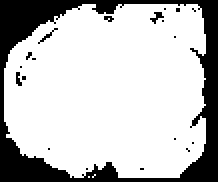

In [73]:
msk=falses(SHAPE)
for i = rng_neg    
    msk[i] = true
end
msk = msk .& (nimm.> 10.)
ni2 = ni[:,:,:,1]
@manipulate  for i in 1:size(msk,3) Gray.(msk)[:,:,i] end

In [31]:
rng = collect(CartesianRange(CartesianIndex((3,3,3)),(CartesianIndex(SHAPE)-2)))
@time res = [(cnt,mn_cor(ni,cnt)) for cnt in sample(rng,4000)]
filter!(x->!isnan(x[2]),res)
sort!(res, by=x->x[2])
# plot((x->x[2]).(res))
mean((x->x[2]).(res))

  5.423154 seconds (142.03 M allocations: 5.277 GiB, 15.42% gc time)


0.65110034f0

In [32]:
?@gif

Builds an `Animation` using one frame per loop iteration, then create an animated GIF.

Example:

```
  p = plot(1)
  @gif for x=0:0.1:5
    push!(p, 1, sin(x))
  end
```


In [71]:
# X = linspace(0,8π,1000)
# Y = randn(1000)/2. + cos.(X)/3

# Y = ni[28,28,57,:]
# Y2 = ni[26,26,55,:]
X = 1:3600
cent = CartesianIndex(45, 25, 31)
TS = reshape([ewma(ni[coord.I...,:], 0.1)[X] for coord in δ(cent)], (27))
# plot([ewma(Y2)[X],ewma(Y)[X]],labels=["[27,27,57,:]","[28,28,57,:]"])
p = plot(X,TS,labels=[repr(x.I) for x in δ(cent)])
m = [cor(t1,t2) for t1 in TS, t2 in TS ]
# mean(m)

# plot!(X,label=)
show(p)

Plot{Plots.PlotlyBackend() n=27}

In [170]:
m = [cor(t1,t2) for t1 in TS, t2 in TS ]
mean(m)
ticks = [repr(x.I) for x in δ(cent)]
# show(ticks)
spy(m,xformatter = n -> ticks[Int(n)],size = (600,600))


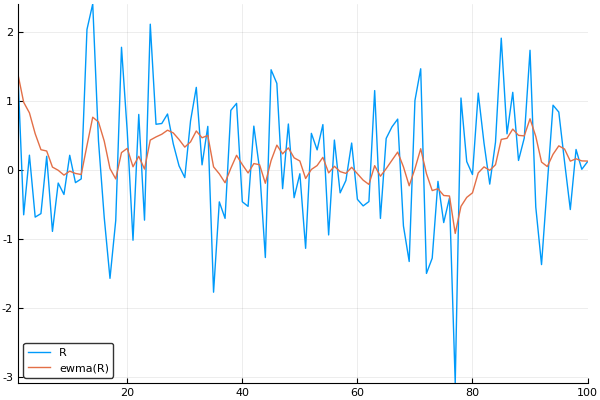

In [33]:
r = randn(100)
plot(r, label="R")
plot!(ewma(r,0.2),label = "ewma(R)" )

In [100]:
d = 1
Gclear = copy(Gl);
Gclear[:,:,1:2] .= 0 
Gclear[:,1:2,:] .= 0 
Gclear[1:2,:,:] .= 0 

Gclear[:,:,end-1:end] .= 0 
Gclear[:,end-1:end,:] .= 0 
Gclear[end-1:end,:,:] .= 0;


In [97]:
plot([maximum(Gclear[:,:,x]) for x=1:size(Gl,3)])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 40 
 
 
 60 
 
 
 80 
 
 
 0 
 
 
 5000 
 
 
 10000 
 
 
 15000 
 
 
 20000 
 
<polyline clip-path="url(#clip4802)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 48.6962,375.813 54.6031,375.813 60.5099,337.595 66.4168,333.39 72.3237,332.408 78.2306,326.162 84.1374,329.878 90.0443,336.495 95.9512,333.559 101.858,337.61 
 107.765,337.906 113.672,347.233 119.579,343.866 125.486,348.47 131.392,338.038 137.299,333.294 143.206,338.213 149.113,341.034 155.02,339.28 160.927,338.663 
 166.834,330.091 172.741,325.874 178.647,330.197 184.554,313.869 190.461,280.732 196.368,235.045 202.275,230.735 208.182,147.059 214.089,37.6863 219.996,14.0629 
 225.902,11.811 231.809,140.004 237.716,87.2374 243.623,118.062 249.53,265.885 255.437,271.534 261.344,285.76 267.251,264.66 273.157,294.342 279.064,301.185 
 284.971,309.82 290.878,307.311 296.785,305.169 302.692,312.086 308.599,320.884 314.506,332.743 320.412,325.062 326.319,339.437 332.226,339.558 338.133,327.794 
 344.04,327.569 349.947,328.423 355.854,319.6 361.761,322.208 367.667,331.126 373.574,334.577 379.481,340.065 385.388,341.486 391.295,339.561 397.202,348.016 
 403.109,340.913 409.016,340.475 414.922,336.369 420.829,323.131 426.736,313.558 432.643,314.169 438.55,304.01 444.457,294.688 450.364,281.782 456.271,291.216 
 462.177,308.163 468.084,301.835 473.991,277.55 479.898,290.469 485.805,322.89 491.712,319.892 497.619,326.824 503.526,331.043 509.432,338.524 515.339,355.892 
 521.246,362.14 527.153,361.435 533.06,362.196 538.967,362.111 544.874,361.319 550.781,363.209 556.687,366.504 562.594,368.825 568.501,369.302 574.408,375.813 
 580.315,375.813 
 "/>
 
 
 
 
 y1

In [204]:
t = ["S1","S2"]
patient = subj
kd = KData(PATH,"$patient/detre*.nii","logs/$patient.*",
    x->readxl(DataFrame,x,"Лист1!A1:G$(NEXP+1)"))
meta = kd.meta
y = reduce((x,y)-> x .| y,(Array(meta[:Stimul_1].== w) for w in t)) # all rows with stimuls in t
y_pred = rand(size(y))

r  = roc(y,y_pred)
sen = (a->a.tp/(a.tp+a.fn)).(r)
spe = (a->a.tn/(a.fp+a.tn)).(r)
pl = plot(sen,1-spe, label = "random")
y_pred = Array{Float64}(y)
y_pred[sample(1:size(y,1),10)] = 0
y_pred[sample(1:size(y,1),10)] = 1
r  = roc(y,y_pred)
sen = (a->a.tp/(a.tp+a.fn)).(r)
spe = (a->a.tn/(a.fp+a.tn)).(r)
pl = plot!(1-spe,sen, label = "meta-cluster classifier")
pl

INFO: single file read String["/media/ashedko/_data_/datasets/UNC/1/detrended.nii"]
INFO: Meta Read: String["/media/ashedko/_data_/datasets/UNC/logs/1.xlsx"]


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 1.0 
 
 
 0.0 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 1.0 
 
<polyline clip-path="url(#clip3702)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 580.315,11.811 580.315,23.9444 580.315,42.1446 562.045,42.1446 562.045,48.2113 562.045,54.278 
 562.045,60.3447 562.045,72.4781 562.045,78.5448 562.045,84.6115 562.045,96.7449 562.045,102.812 
 543.775,102.812 543.775,114.945 525.506,114.945 507.236,121.012 488.966,127.078 452.427,127.078 452.427,133.145 452.427,145.279 
 452.427,151.345 434.157,157.412 434.157,163.479 434.157,175.612 415.887,181.679 397.617,181.679 
 397.617,187.746 397.617,193.812 397.617,199.879 379.348,199.879 
 361.078,205.946 361.078,212.012 361.078,218.079 342.808,218.079 324.538,224.146 
 324.538,230.212 324.538,242.346 306.269,242.346 287.999,242.346 
 269.729,248.413 233.189,248.413 214.92,248.413 196.65,254.479 196.65,260.546 196.65,266.613 178.38,266.613 178.38,272.679 
 160.11,272.679 141.841,278.746 141.841,290.88 123.571,296.946 123.571,309.08 105.301,309.08 105.301,315.146 87.0314,321.213 87.0314,327.28 
 68.7616,327.28 68.7616,333.347 68.7616,339.413 68.7616,345.48 50.4919,357.613 32.2221,375.813 
 
 "/>
 
 
 
 
 
 random 
 
 
 
 meta-cluster classifier

In [161]:
using MLBase, DataFrames

In [205]:
abs.(y_pred - y) |> sum

8.0

In [ ]:
Тогда значение Sen=TP/(TP+FN),
способность алгоритма «видеть» больных,
называется чувствительность, Spe=TN/(TN+FP) — специфичность,
способность алгоритма не принимать здоровых за больных.

Бывает, что классификатор выдаёт не бит «здоров-болен»,
а число: «явно здоров» — «скорее всего, здоров» — «неопределённо» — «с